This analysis delves into the study about the article relationships based on keyword similarities within a specific time frame around the emergence of COVID-19. We are looking at articles from April 2019 for data before COVID-19 and from one year later, April 2020, for data after the COVID-19 global outbreak. The dataset focuses on articles published by The New York Times, serving as a temporal case study to understand media focus shifts during a significant global event.

**Network Composition:**
- **Nodes:** Articles
- **Edges:** Relationships based on common keywords

**Network Type:**
The dataset forms an Undirected Unweighted Networks, where ach edge indicates shared keywords between articles.

**Data Structure:**
Each network structured with nodes representing individual articles identified by their URLs, and edges reflecting the keyword overlap connection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

**Loading the networks and printing basic details about each of them**

In [ ]:
# Load the graph
G_keyword_pre = nx.read_adjlist("/content/drive/MyDrive/keyword_network_pre.txt")

# Compute network statistics
N = len(G_keyword_pre)
L = G_keyword_pre.size()
degrees_keyword_pre = [G_keyword_pre.degree[node] for node in G_keyword_pre]
kmin = np.min(degrees_keyword_pre)
kmax = np.max(degrees_keyword_pre)
kavg = np.mean(degrees_keyword_pre)

print("Keyword Network Pre-COVID details:")
print("N =", N)
print("L =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Keyword Network Pre-COVID details:
N = 565
L = 8824
Average degree = 31.235398230088496
Min degree = 0
Max degree = 173


In [ ]:
# Load the graph
G_keyword_post = nx.read_adjlist("/content/drive/MyDrive/keyword_network_post.txt")

# Compute network statistics
N = len(G_keyword_post)
L = G_keyword_post.size()
degrees_keyword_post = [G_keyword_post.degree[node] for node in G_keyword_post]
kmin = np.min(degrees_keyword_post)
kmax = np.max(degrees_keyword_post)
kavg = np.mean(degrees_keyword_post)

print("Keyword Network Post-COVID details:")
print("N =", N)
print("L =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Keyword Network Post-COVID details:
N = 627
L = 86532
Average degree = 276.01913875598086
Min degree = 0
Max degree = 438


Initially, the pre-COVID network consisted of 565 nodes and 8,324 edges with an average degree of connectivity at 31.24. In contrast, the post-COVID network expanded to 627 nodes and surged to 86,532 edges, with an average degree of connectivity increasing dramatically to 276.19. This comparison underscores a notable expansion in both the size of the network and the density of connections, indicating a broader and more interconnected discourse in news coverage following the onset of the pandemic. The increase in maximum degree from 173 to 438 further highlights the emergence of key themes or terms that have become focal points in journalistic content. These shifts illustrate how global events like the COVID-19 pandemic can drive significant transformations in the narrative structures of media outlets, reflecting an increase in complexity and connectivity in response to evolving news landscapes.

**Calculating the connected components and isolated nodes**


In [ ]:
# Compute connected components and the size of the largest one
isolated_nodes_pre = list(nx.isolates(G_keyword_pre))
print("Number of isolated nodes in keyword pre-COVID network:", len(isolated_nodes_pre))
connected_components_keyword_pre = list(nx.connected_components(G_keyword_pre))
largest_component_keyword_pre = max(connected_components_keyword_pre, key=len)
G_keyword_lcc_pre = G_keyword_pre.subgraph(largest_component_keyword_pre)
size_of_largest_component_keyword_pre = len(largest_component_keyword_pre)
print("Number of connected components in keyword pre-COVID network:", len(connected_components_keyword_pre))
print("Size of Largest Connected Component in keyword pre-COVID network:", size_of_largest_component_keyword_pre)

Number of isolated nodes in keyword pre-COVID network: 53
Number of connected components in keyword pre-COVID network: 55
Size of Largest Connected Component in keyword pre-COVID network: 510


In [ ]:
# Compute connected components and the size of the largest one
isolated_nodes_post = list(nx.isolates(G_keyword_post))
print("Number of isolated nodes in keyword post-COVID network:", len(isolated_nodes_post))
connected_components_keyword_post = list(nx.connected_components(G_keyword_post))
largest_component_keyword_post = max(connected_components_keyword_post, key=len)
G_keyword_lcc_post = G_keyword_post.subgraph(largest_component_keyword_post)
size_of_largest_component_keyword_post = len(largest_component_keyword_post)
print("Number of connected components in keyword post-COVID network:", len(connected_components_keyword_post))
print("Size of Largest Connected Component in keyword post-COVID network:", size_of_largest_component_keyword_post)

Number of isolated nodes in keyword post-COVID network: 42
Number of connected components in keyword post-COVID network: 44
Size of Largest Connected Component in keyword post-COVID network: 582


The reduction in both the number of isolated nodes and the total number of connected components post-COVID suggests a tighter integration of topics within news articles, reflecting an increased focus on interconnected issues due to the pandemic. The growth in the size of the largest connected component further highlights this trend towards more unified reporting, where a larger array of topics was discussed in relation to each other, emphasizing the widespread impact of the pandemic on various facets of news coverage.

**Calculating the diameter**

In [ ]:
diameter_keyword_pre = nx.diameter(G_keyword_lcc_pre)
print("Diameter of the largest connected component in keyword pre-COVID network:", diameter_keyword_pre)

Diameter of the largest connected component in keyword pre-COVID network: 7


In [ ]:
diameter_keyword_post = nx.diameter(G_keyword_lcc_post)
print("Diameter of the largest connected component in keyword post-COVID network:", diameter_keyword_post)

Diameter of the largest connected component in keyword post-COVID network: 5


The decrease in the network diameter from 7 to 5 post-COVID suggests a tighter clustering of discussion topics within the largest connected component. It indicates that the New York Times coverage may have become more streamlined or focused due to the centralization of news around pivotal issues directly related to or stemming from the pandemic.

**Calculating Shortest Paths**


In [ ]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 10

# Identify the top N highest degree nodes
top_nodes = sorted(G_keyword_pre.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_ids = [node[0] for node in top_nodes]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs = {}

# Calculate shortest paths between hubs (ignoring edge weights)
for source in top_node_ids:
    for target in top_node_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G_keyword_pre, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs.items():
    print(f"Length of shortest path from node {pair[0]} to node {pair[1]}: {len(path)}")

Length of shortest path from node https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html to node https://www.nytimes.com/interactive/2019/04/03/magazine/rupert-murdoch-fox-news-trump.html: 2
Length of shortest path from node https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html to node https://www.nytimes.com/interactive/2019/04/03/magazine/murdoch-family-investigation.html: 2
Length of shortest path from node https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html to node https://www.nytimes.com/2019/04/03/nyregion/trump-twitter-block-lawsuit.html: 2
Length of shortest path from node https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html to node https://www.nytimes.com/interactive/2019/04/03/magazine/new-fox-corporation-disney-deal.html: 2
Length of shortest path from node https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html to node https://www.nytimes.com/2019/04/02/world/americ

In [ ]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 10

# Identify the top N highest degree nodes
top_nodes = sorted(G_keyword_post.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_ids = [node[0] for node in top_nodes]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs = {}

# Calculate shortest paths between hubs (ignoring edge weights)
for source in top_node_ids:
    for target in top_node_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G_keyword_post, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs.items():
    print(f"Length of shortest path from node {pair[0]} to node {pair[1]}: {len(path)}")

Length of shortest path from node https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html to node https://www.nytimes.com/2020/04/02/nyregion/nyc-things-to-do-coronavirus-quarantine.html: 2
Length of shortest path from node https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html to node https://www.nytimes.com/2020/04/03/t-magazine/where-to-donate-arts-coronavirus.html: 2
Length of shortest path from node https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html to node https://www.nytimes.com/2020/04/03/nyregion/cuomo-trump-coronavirus.html: 2
Length of shortest path from node https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html to node https://www.nytimes.com/2020/04/03/us/politics/maryland-coronavirus.html: 2
Length of shortest path from node https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html to node https://www.nytimes.com/2020/04/03/parenting/kids-independent-pl

The consistency of the path length being 2 in both pre and post-COVID networks indicates that while the specific topics and their connectivity might have evolved or expanded due to the pandemic, the fundamental structure of the network, in terms of how top topics are interconnected, remains stable. This stability is crucial for the news organization, as it provides a reliable framework within which new information can be incorporated and linked to existing narratives efficiently.

**Average Clustering Coefficient**

In [ ]:
average_clustering_coefficient_keyword_pre = nx.average_clustering(G_keyword_pre)
print("Average Clustering Coefficient in pre-COVID network:", average_clustering_coefficient_keyword_pre)
edge_density_keyword_pre = nx.density(G_keyword_pre)
print("Edge Density in pre-COVID network:", edge_density_keyword_pre)

Average Clustering Coefficient in pre-COVID network: 0.6100080946470765
Edge Density in pre-COVID network: 0.055381911755476056


In [ ]:
average_clustering_coefficient_keyword_post = nx.average_clustering(G_keyword_post)
print("Average Clustering Coefficient in post-COVID network:", average_clustering_coefficient_keyword_post)
edge_density_keyword_post = nx.density(G_keyword_post)
print("Edge Density in post-COVID network:", edge_density_keyword_post)

Average Clustering Coefficient in post-COVID network: 0.8625607523676652
Edge Density in post-COVID network: 0.440925141782717


The observed increase in the clustering coefficient to 0.86 and the substantial rise in edge density to 0.44 in the post-COVID keyword network suggest a transformative shift in the New York Times' coverage patterns. This combination indicates a more interconnected and cohesive network where not only are individual clusters of keywords more tightly knit, but the overall connectivity across the network has also intensified significantly. Such a structural evolution reflects a journalistic focus that has adapted to the complexities of the pandemic, centering on a dense interlinkage of topics. This likely represents a deliberate strategy to explore the multifaceted impacts of COVID-19 across various interconnected themes, enhancing the comprehensiveness and depth of the coverage. The network's denser and more clustered configuration suggests a narrative environment where central issues are extensively cross-referenced, providing readers with a richer, more interconnected understanding of the ongoing events and their broader implications.

**Degree Distribution**

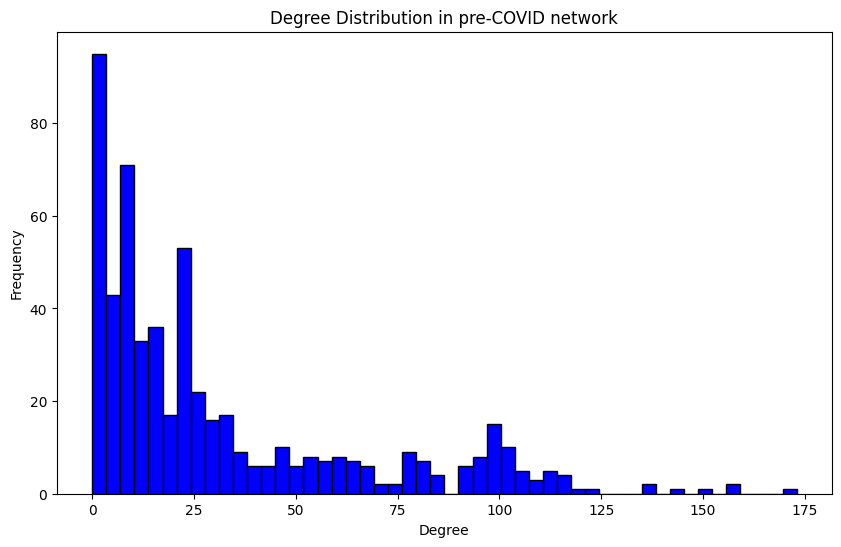

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees_keyword_pre, bins=50, color='blue', edgecolor='black')
plt.title('Degree Distribution in pre-COVID network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
plt.close()

# Calculate degree frequencies
degree_sequence_keyword_pre = sorted([d for n, d in G_keyword_pre.degree()], reverse=True)
degree_count_keyword_pre = Counter(degree_sequence_keyword_pre)
deg, cnt = zip(*degree_count_keyword_pre.items())

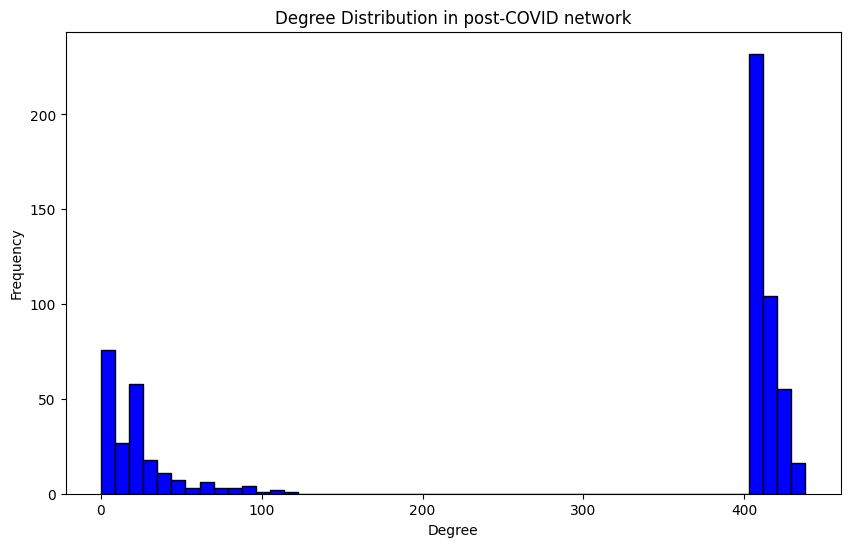

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees_keyword_post, bins=50, color='blue', edgecolor='black')
plt.title('Degree Distribution in post-COVID network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Calculate degree frequencies
degree_sequence_keyword_post = sorted([d for n, d in G_keyword_post.degree()], reverse=True)
degree_count_keyword_post = Counter(degree_sequence_keyword_post)
deg, cnt = zip(*degree_count_keyword_post.items())

**Pre-COVID Network Degree Distribution**

The degree distribution in the pre-COVID network is characteristic of a scale-free network, which typically shows a power-law distribution where most nodes have a relatively low degree and a small number of nodes have a high degree. This is evident from the frequency of nodes with low degree values being significantly higher and tapering off as degree increases. The presence of such a distribution suggests that the pre-COVID network had a few highly central nodes (or hubs) that were significantly more connected than others, a common feature in networks where a few topics or themes dominate the discourse.

**Post-COVID Network Degree Distribution**

The post-COVID network exhibits a degree distribution where the frequency of nodes rapidly decreases as the degree increases, but this trend is broken by a significant concentration of nodes with very high degrees compared. Unlike a scale-free network, which typically follows a power-law distribution tapering off gradually, the post-COVID distribution features a more pronounced peak at higher degrees, suggesting a notable increase in the number of highly connected nodes. This indicates an altered network structure where many more nodes act as central hubs compared to the pre-COVID scenario.


---

The alteration from a classic scale-free network to one where more nodes become highly connected suggests significant changes in the news ecosystem due to the pandemic. In the pre-COVID setup, a few key topics might have disproportionately dominated discussions, mirroring the structure where a small number of hubs were extremely well-connected. The shift seen in the post-COVID network—where more nodes are highly connected—reflects a broadening of central themes within news coverage, perhaps due to the cross-cutting impact of the pandemic on various sectors and themes. This evolution could indicate a more integrated approach to news coverage, where various issues are seen as interlinked and are given more equitable emphasis within the discourse.

**Clustering Coefficient Distribution**

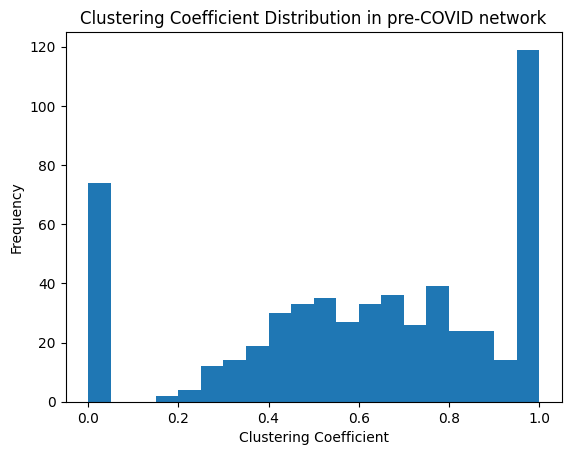

In [ ]:
# Clustering coefficient distribution
clustering_coefficients_keyword_pre = nx.clustering(G_keyword_pre)
plt.hist(clustering_coefficients_keyword_pre.values(), bins=20)
plt.title("Clustering Coefficient Distribution in pre-COVID network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

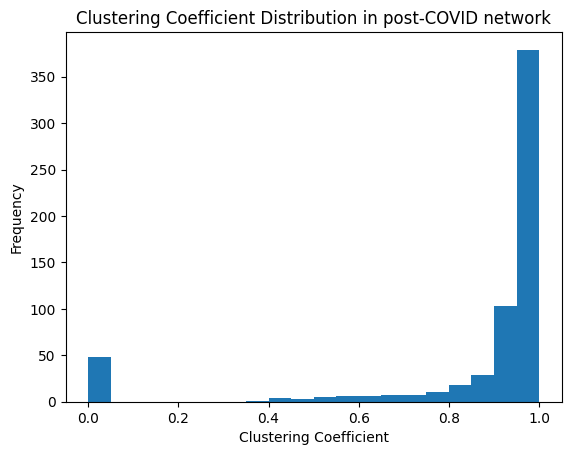

In [ ]:
# Clustering coefficient distribution
clustering_coefficients_keyword_post = nx.clustering(G_keyword_post)
plt.hist(clustering_coefficients_keyword_post.values(), bins=20)
plt.title("Clustering Coefficient Distribution in post-COVID network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

**Pre-COVID Network Clustering Coefficient Distribution**

In the pre-COVID network, the clustering coefficient distribution is relatively spread across different values, with notable frequencies at very low values (near 0) and a significant peak at 1.0. This distribution suggests a polarization within the network, where many nodes either do not cluster at all or form perfect triangles, indicating that either nodes do not share neighbors with each other or are completely interconnected with their neighbors. The presence of many nodes with a clustering coefficient of 0 implies that numerous topics within the pre-COVID news landscape were relatively isolated or had loose connections with only a couple of other nodes.

**Post-COVID Network Clustering Coefficient Distribution**

In contrast, the post-COVID network shows a dramatic increase in the number of nodes with a clustering coefficient of 1.0, with fewer nodes exhibiting lower clustering values. This shift indicates a substantial increase in completely interconnected triplets of nodes, where topics are more likely to form tightly interconnected groups. The reduction in nodes with a low clustering coefficient and the significant increase at the high end of the scale reflect a more cohesive network structure, where nodes are much more likely to be part of tightly interconnected groups.

---

The evolution in the clustering coefficient distribution from the pre-COVID to the post-COVID network suggests a deepening of thematic integration within the news coverage. Post-COVID, topics are not only more interconnected but are likely to share common links, forming closed loops of discussion that reinforce each other. This could be indicative of a more focused approach in journalism, where related issues are frequently discussed together, possibly in the context of the pandemic's multifaceted impacts.

**Betweenness Centrality Distribution**

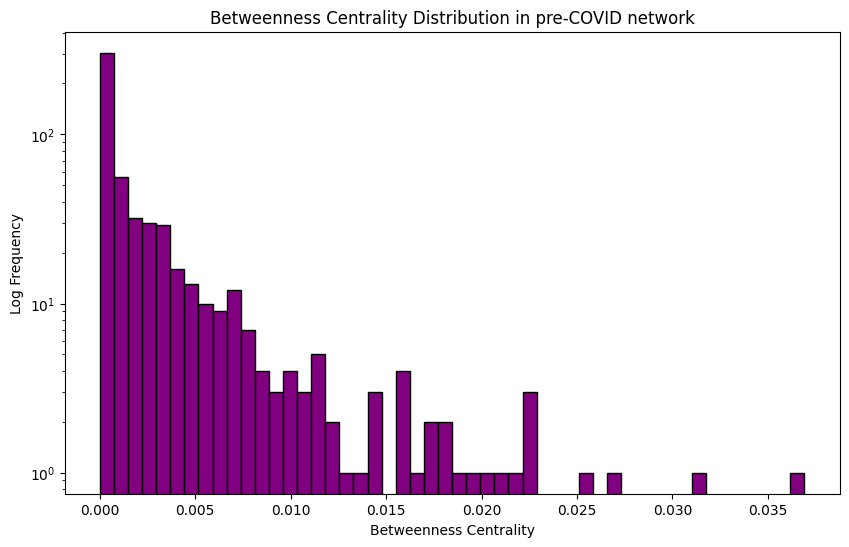

In [ ]:
# Calculate the betweenness centrality for each node
bet_centrality_keyword_pre = nx.betweenness_centrality(G_keyword_pre)
values = list(bet_centrality_keyword_pre.values())

# Plot the distribution of betweenness centrality values
plt.figure(figsize=(10, 6))
# Plot with a log scale on the y-axis
plt.hist(values, bins=50, log=True, color='purple', edgecolor='black')
plt.title('Betweenness Centrality Distribution in pre-COVID network')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Log Frequency')
plt.show()

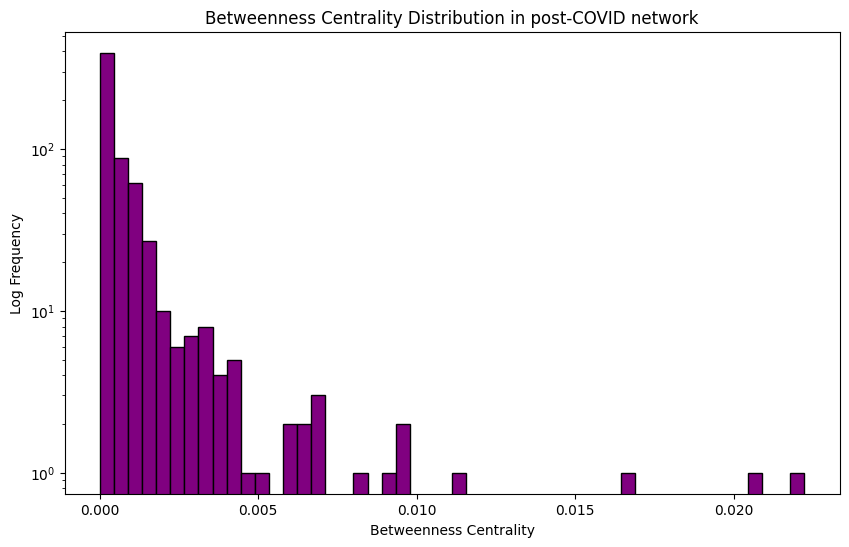

In [ ]:
# Calculate the betweenness centrality for each node
bet_centrality_keyword_post = nx.betweenness_centrality(G_keyword_post)
values = list(bet_centrality_keyword_post.values())

# Plot the distribution of betweenness centrality values
plt.figure(figsize=(10, 6))
# Plot with a log scale on the y-axis
plt.hist(values, bins=50, log=True, color='purple', edgecolor='black')
plt.title('Betweenness Centrality Distribution in post-COVID network')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Log Frequency')
plt.show()

**Pre-COVID Network Betweenness Centrality Distribution**

The pre-COVID network displays a broad range of betweenness centrality values with a higher concentration at lower values, as shown by the steep initial drop in the frequency on a logarithmic scale. This indicates that most nodes have a relatively minor role in connecting different parts of the network, with only a few nodes acting as significant brokers of information flow. These key nodes likely represent major themes or topics that bridge diverse content areas within the pre-COVID news landscape.

**Post-COVID Network Betweenness Centrality Distribution**

In contrast, the post-COVID network shows a similar pattern but with a slight shift towards lower overall betweenness centrality values. The concentration of nodes with lower centrality is even more pronounced, suggesting that fewer nodes serve as critical points of connection between different parts of the network. This might indicate a consolidation or integration of topics where fewer distinct thematic bridges are necessary to connect different discussions, reflecting a more unified approach to news coverage focusing on interconnected pandemic-related themes.

---

The shift towards a greater concentration of nodes with lower betweenness centrality in the post-COVID network suggests a change in the informational architecture of the network. In the pre-COVID setup, the presence of nodes with high betweenness centrality indicates a network structured around several key nodes that linked various themes. Post-COVID, the reduction in such nodes implies a flattening or evening out of the network's structure, where the importance of individual nodes as central connectors has diminished. This could reflect a narrative environment where pandemic-related topics are so intrinsically linked that the need for specific nodes to serve as bridges has decreased. Instead, a larger number of nodes now participate more equally in the narrative, contributing to a more cohesive and integrated discussion landscape.

**Connected Components Size Distribution**

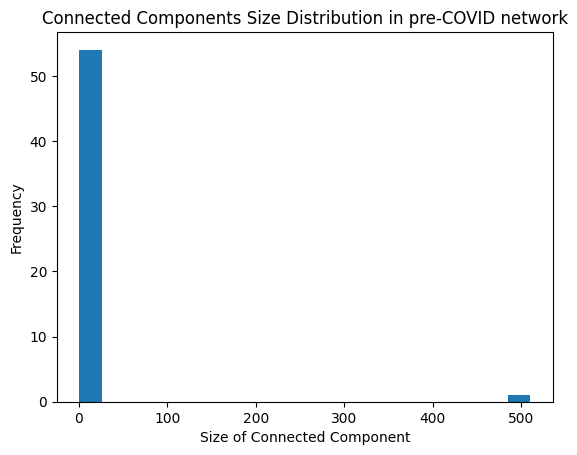

In [ ]:
# Connected components size distribution
connected_components_keyword_pre = sorted(nx.connected_components(G_keyword_pre), key=len, reverse=True)
component_sizes_keyword_pre = [len(component) for component in connected_components_keyword_pre]
plt.hist(component_sizes_keyword_pre, bins=20)
plt.title("Connected Components Size Distribution in pre-COVID network")
plt.xlabel("Size of Connected Component")
plt.ylabel("Frequency")
plt.show()

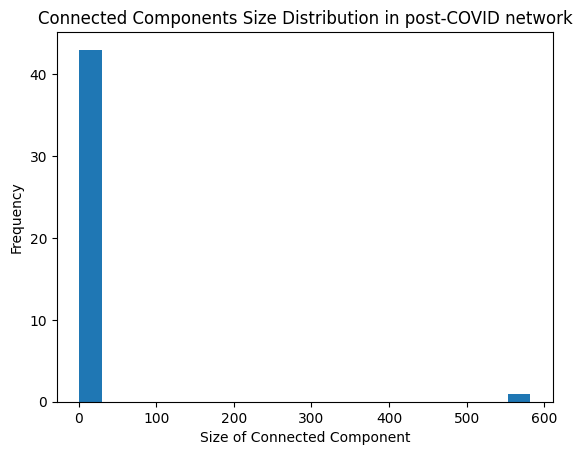

In [ ]:
# Connected components size distribution
connected_components_keyword_post = sorted(nx.connected_components(G_keyword_post), key=len, reverse=True)
component_sizes_keyword_post = [len(component) for component in connected_components_keyword_post]
plt.hist(component_sizes_keyword_post, bins=20)
plt.title("Connected Components Size Distribution in post-COVID network")
plt.xlabel("Size of Connected Component")
plt.ylabel("Frequency")
plt.show()

**Pre-COVID Network Connected Components Size Distribution**

In the pre-COVID network, the distribution prominently shows a large number of components clustered at a very small size with one significantly large component at the other end of the spectrum. This indicates a dominant giant component, typical of real-world networks, which encompasses a large majority of the nodes, reflecting a broad, interconnected discussion. However, the presence of several very small components suggests the existence of isolated topics or clusters of topics that are less integrated with the main discourse.

**Post-COVID Network Connected Components Size Distribution**

The post-COVID network exhibits a similar pattern but with a noticeable extension in the size of the largest component, indicating its growth. The majority of components remain small, suggesting that while the principal component has become more extensive and presumably includes a broader range of topics, many specific clusters still remain relatively isolated or focused on niche areas.

---

The growth of the largest connected component in the post-COVID network suggests an increase in the range of topics that are being interconnected, likely driven by the expansive impact of the pandemic on various facets of life and policy. This change underscores a more integrated approach to news coverage, where different issues are increasingly linked, reflecting the complex interdependencies exposed or heightened by the pandemic.

In [ ]:
import requests

API_KEY = "xdf9HSiXK8510t7HU1bVdpF2R36I0UQ4"
BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

def fetch_article_keywords(url):
    params = {
        'fq': f'web_url:("{url}")',
        'api-key': API_KEY
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if data['response']['docs']:
        doc = data['response']['docs'][0]
        keywords = [kw['value'] for kw in doc['keywords']]
        return keywords
    else:
        return []

**Degree Centrality** measures how many ties a node has to other nodes. The pre-COVID network's top articles mainly focus on political figures and issues, indicating a dense interconnection around these subjects. In contrast, the post-COVID network shows a strong focus on the Coronavirus, reflecting how the pandemic became central to many discussions, linking various topics like politics, public health, and social issues.

In [ ]:
sorted_degree_centrality = sorted(nx.degree_centrality(G_keyword_pre).items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by degree centrality in pre-COVID network:")
for url, centrality in sorted_degree_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 articles by degree centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html
Keywords: Presidential Election of 2020, Biden, Joseph R Jr, Sexual Harassment, Sex, #MeToo Movement, Podcasts, United States Politics and Government, Politics and Government, Conservatism (US Politics), Liberalism (US Politics), Democratic Party, Women and Girls, Men and Boys, Millennial Generation, Generation Z, Teenagers and Adolescence, Trump, Donald J, Buttigieg, Pete (1982- ), O'Rourke, Beto, Whites

URL: https://www.nytimes.com/interactive/2019/04/03/magazine/rupert-murdoch-fox-news-trump.html
Keywords: Murdoch, Rupert, Fox News Channel, 21st Century Fox, News and News Media, Presidential Election of 2016, United States Politics and Government, Great Britain, Politics and Government, Regulation and Deregulation of Industry, Conservatism (US Politics), Family Business, New York Post, News Corporation, News of the World, Sky PLC, Sky Television

In [ ]:
sorted_degree_centrality = sorted(nx.degree_centrality(G_keyword_post).items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by degree centrality in post-COVID network:")
for url, centrality in sorted_degree_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 articles by degree centrality in post-COVID network:
URL: https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html
Keywords: Coronavirus (2019-nCoV), Florida, DeSantis, Ron, Politics and Government, Quarantines, Travel and Vacations, Epidemics, Beaches, Deaths (Fatalities), Federal-State Relations (US), Trump, Donald J, United States Politics and Government

URL: https://www.nytimes.com/2020/04/02/nyregion/nyc-things-to-do-coronavirus-quarantine.html
Keywords: Coronavirus (2019-nCoV), Art, Culture (Arts), Shutdowns (Institutional), Movies, Music, New York City

URL: https://www.nytimes.com/2020/04/03/t-magazine/where-to-donate-arts-coronavirus.html
Keywords: Art, Culture (Arts), Philanthropy, Theater, Books and Literature, Coronavirus (2019-nCoV), Restaurants, ACTORS' FUND OF AMERICA, Dance/NYC, GoFundMe, New York Foundation for the Arts, New York City

URL: https://www.nytimes.com/2020/04/03/nyregion/cuomo-trump-coronavirus.html
Keywords: Coronavirus (2019-

**Betweenness Centrality** captures nodes that serve as bridges between other nodes. The shift from broader political and global themes pre-COVID to more focused pandemic-related topics post-COVID indicates that certain subjects began to act more frequently as bridges in the discourse network, possibly due to their increasing relevance to various facets of life during the pandemic.

In [ ]:
sorted_betweenness_centrality = sorted(bet_centrality_keyword_pre.items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by betweenness centrality in pre-COVID network:")
for url, centrality in sorted_betweenness_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 articles by betweenness centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html
Keywords: Presidential Election of 2020, Biden, Joseph R Jr, Sexual Harassment, Sex, #MeToo Movement, Podcasts, United States Politics and Government, Politics and Government, Conservatism (US Politics), Liberalism (US Politics), Democratic Party, Women and Girls, Men and Boys, Millennial Generation, Generation Z, Teenagers and Adolescence, Trump, Donald J, Buttigieg, Pete (1982- ), O'Rourke, Beto, Whites

URL: https://www.nytimes.com/interactive/2019/obituaries/notable-deaths-sports.html
Keywords: Baseball, Athletics and Sports, Hockey, Ice, Bundy, King Kong (1955-2019), HOWELL, HARRY

URL: https://www.nytimes.com/2019/04/02/arts/national-endowment-for-the-humanities-grants.html
Keywords: Historic Buildings and Sites, Christ Church (Philadelphia, Pa), Culture (Arts), National Endowment for the Humanities, Humanities, Writing and Writers, Unite

In [ ]:
sorted_betweenness_centrality = sorted(bet_centrality_keyword_post.items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by betweenness centrality in post-COVID network:")
for url, centrality in sorted_betweenness_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 articles by betweenness centrality in post-COVID network:
URL: https://www.nytimes.com/2020/04/01/arts/television/late-night-tv-coronavirus.html
Keywords: Coronavirus (2019-nCoV), Television, Meyers, Seth, Comedy and Humor, Conan (TV Program), Desus & Mero (TV Program), Full Frontal With Samantha Bee (TV Program), Jimmy Kimmel Live (TV Program), Late Night with Seth Meyers (TV Program), Late Show with Stephen Colbert (TV Program), The Daily Show with Trevor Noah (TV Program), The Tonight Show (TV Program)

URL: https://www.nytimes.com/2020/04/02/nyregion/nyc-things-to-do-coronavirus-quarantine.html
Keywords: Coronavirus (2019-nCoV), Art, Culture (Arts), Shutdowns (Institutional), Movies, Music, New York City

URL: https://www.nytimes.com/2020/04/01/movies/baseball-movies-streaming.html
Keywords: Baseball, Movies, A League of Their Own (Movie), Bull Durham (Play), Eight Men Out (Movie), Field of Dreams (Movie), Major League (Movie), The Natural (Movie), Coronavirus (2019-nCoV), Th

**Closeness Centrality** indicates how close a node is to all other nodes. Articles that score high pre-COVID often discussed enduring themes in U.S. politics and governance, hinting at these topics' central role in linking various discussions. Post-COVID, the emphasis shifts to more immediate and urgent topics, reflecting their growing importance and central role in the narrative web of the pandemic.

In [ ]:
sorted_closeness_centrality = sorted(nx.closeness_centrality(G_keyword_pre).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in pre-COVID network:")
for url, centrality in sorted_closeness_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 nodes by closeness centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/04/04/opinion/the-argument-joe-biden-2020.html
Keywords: Presidential Election of 2020, Biden, Joseph R Jr, Sexual Harassment, Sex, #MeToo Movement, Podcasts, United States Politics and Government, Politics and Government, Conservatism (US Politics), Liberalism (US Politics), Democratic Party, Women and Girls, Men and Boys, Millennial Generation, Generation Z, Teenagers and Adolescence, Trump, Donald J, Buttigieg, Pete (1982- ), O'Rourke, Beto, Whites

URL: https://www.nytimes.com/2019/04/03/nyregion/trump-twitter-block-lawsuit.html
Keywords: Trump, Donald J, King, Peter T, Censorship, Social Media, First Amendment (US Constitution), Facebook Inc, Long Island (NY), Decisions and Verdicts, Twitter, Politics and Government, United States Politics and Government, Suits and Litigation (Civil)

URL: https://www.nytimes.com/interactive/2019/04/03/magazine/rupert-murdoch-fox-news-trump.html
Keywords: M

In [ ]:
sorted_closeness_centrality = sorted(nx.closeness_centrality(G_keyword_post).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in post-COVID network:")
for url, centrality in sorted_closeness_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 nodes by closeness centrality in post-COVID network:
URL: https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html
Keywords: Coronavirus (2019-nCoV), Florida, DeSantis, Ron, Politics and Government, Quarantines, Travel and Vacations, Epidemics, Beaches, Deaths (Fatalities), Federal-State Relations (US), Trump, Donald J, United States Politics and Government

URL: https://www.nytimes.com/2020/04/02/nyregion/nyc-things-to-do-coronavirus-quarantine.html
Keywords: Coronavirus (2019-nCoV), Art, Culture (Arts), Shutdowns (Institutional), Movies, Music, New York City

URL: https://www.nytimes.com/2020/04/03/t-magazine/where-to-donate-arts-coronavirus.html
Keywords: Art, Culture (Arts), Philanthropy, Theater, Books and Literature, Coronavirus (2019-nCoV), Restaurants, ACTORS' FUND OF AMERICA, Dance/NYC, GoFundMe, New York Foundation for the Arts, New York City

URL: https://www.nytimes.com/2020/04/03/nyregion/cuomo-trump-coronavirus.html
Keywords: Coronavirus (2019-

**Eigenvector Centrality** considers a node's connections to high-scoring nodes, emphasizing the influence of connected groups. The focus pre-COVID on enduring influential themes and figures shows strong network positions of long-standing topics, while post-COVID, the focus shifts to topics directly related to the pandemic, emphasizing the centrality and compounded influence of COVID-19 related issues.

In [ ]:
sorted_eigenvector_centrality = sorted(nx.eigenvector_centrality(G_keyword_pre).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in pre-COVID network:")
for url, centrality in sorted_eigenvector_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 nodes by eigenvector centrality in pre-COVID network:
URL: https://www.nytimes.com/2020/04/01/arts/television/late-night-tv-coronavirus.html
Keywords: Coronavirus (2019-nCoV), Television, Meyers, Seth, Comedy and Humor, Conan (TV Program), Desus & Mero (TV Program), Full Frontal With Samantha Bee (TV Program), Jimmy Kimmel Live (TV Program), Late Night with Seth Meyers (TV Program), Late Show with Stephen Colbert (TV Program), The Daily Show with Trevor Noah (TV Program), The Tonight Show (TV Program)

URL: https://www.nytimes.com/2020/04/02/nyregion/nyc-things-to-do-coronavirus-quarantine.html
Keywords: Coronavirus (2019-nCoV), Art, Culture (Arts), Shutdowns (Institutional), Movies, Music, New York City

URL: https://www.nytimes.com/2020/04/01/movies/baseball-movies-streaming.html
Keywords: Baseball, Movies, A League of Their Own (Movie), Bull Durham (Play), Eight Men Out (Movie), Field of Dreams (Movie), Major League (Movie), The Natural (Movie), Coronavirus (2019-nCoV), The Bi

In [ ]:
sorted_eigenvector_centrality = sorted(nx.eigenvector_centrality(G_keyword_post).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in post-COVID network:")
for url, centrality in sorted_eigenvector_centrality[:5]:
    keywords = fetch_article_keywords(url)
    print(f"URL: {url}")
    print(f"Keywords: {', '.join(keywords)}\n")

Top 5 nodes by eigenvector centrality in post-COVID network:
URL: https://www.nytimes.com/2020/04/01/us/coronavirus-florida-de-santis-trump.html
Keywords: Coronavirus (2019-nCoV), Florida, DeSantis, Ron, Politics and Government, Quarantines, Travel and Vacations, Epidemics, Beaches, Deaths (Fatalities), Federal-State Relations (US), Trump, Donald J, United States Politics and Government

URL: https://www.nytimes.com/2020/04/03/us/politics/maryland-coronavirus.html
Keywords: Hogan, Lawrence J, National Governors Assn, Maryland, Politics and Government, Federal-State Relations (US), Trump, Donald J, United States Politics and Government, Coronavirus (2019-nCoV), Medical Devices, Shortages, Tests (Medical), Governors (US), Ventilators (Medical), Masks, Quarantines, Protective Clothing and Gear, Deaths (Fatalities)

URL: https://www.nytimes.com/2020/04/03/nyregion/cuomo-trump-coronavirus.html
Keywords: Coronavirus (2019-nCoV), Coronavirus Aid, Relief, and Economic Security Act (2020), Cuom

The shift in centrality metrics from pre-COVID to post-COVID networks highlights the significant impact of the pandemic on news narratives. Pre-COVID, the centrality measures were distributed across various long-term political and social issues, showing a diverse yet distinctly political and global focus. Post-COVID, there is a clear pivot towards topics directly or indirectly related to the pandemic, illustrating how COVID-19 has not only dominated news coverage but also reshaped the interconnections between various news topics.

**Top 5 Overall Keywords Pre-COVID**

* Trump, Donald J - Central to many discussions, reflecting his significant impact on U.S. and global politics.
* United States Politics and Government - A consistent focus, indicating ongoing national governance discussions.
* Presidential Election of 2020 - Highlighting the political climate and upcoming elections.
* News and News Media - Emphasizing the role of media in shaping public discourse.
* Fox News Channel - Pointing to its influence within the media landscape.

**Top 5 Overall Keywords Post-COVID**

* Coronavirus (2019-nCoV) - Dominating discussions across various contexts.
* Politics and Government - Still central but now more connected with health and policy responses to the pandemic.
* Trump, Donald J - Remaining a pivotal figure through the pandemic.
* United States Politics and Government - Reflecting ongoing governance amidst a crisis.
* New York City - A focal point for COVID-19 impacts and responses.

These shifts not only reflect the immediate impact of COVID-19 on news topics but also suggest a broader realignment of how topics are interconnected, with pandemic-related issues becoming new hubs of narrative connectivity. This change underscores the adaptability of news media in focusing on emergent issues while maintaining links to ongoing thematic elements.

**Visualization**

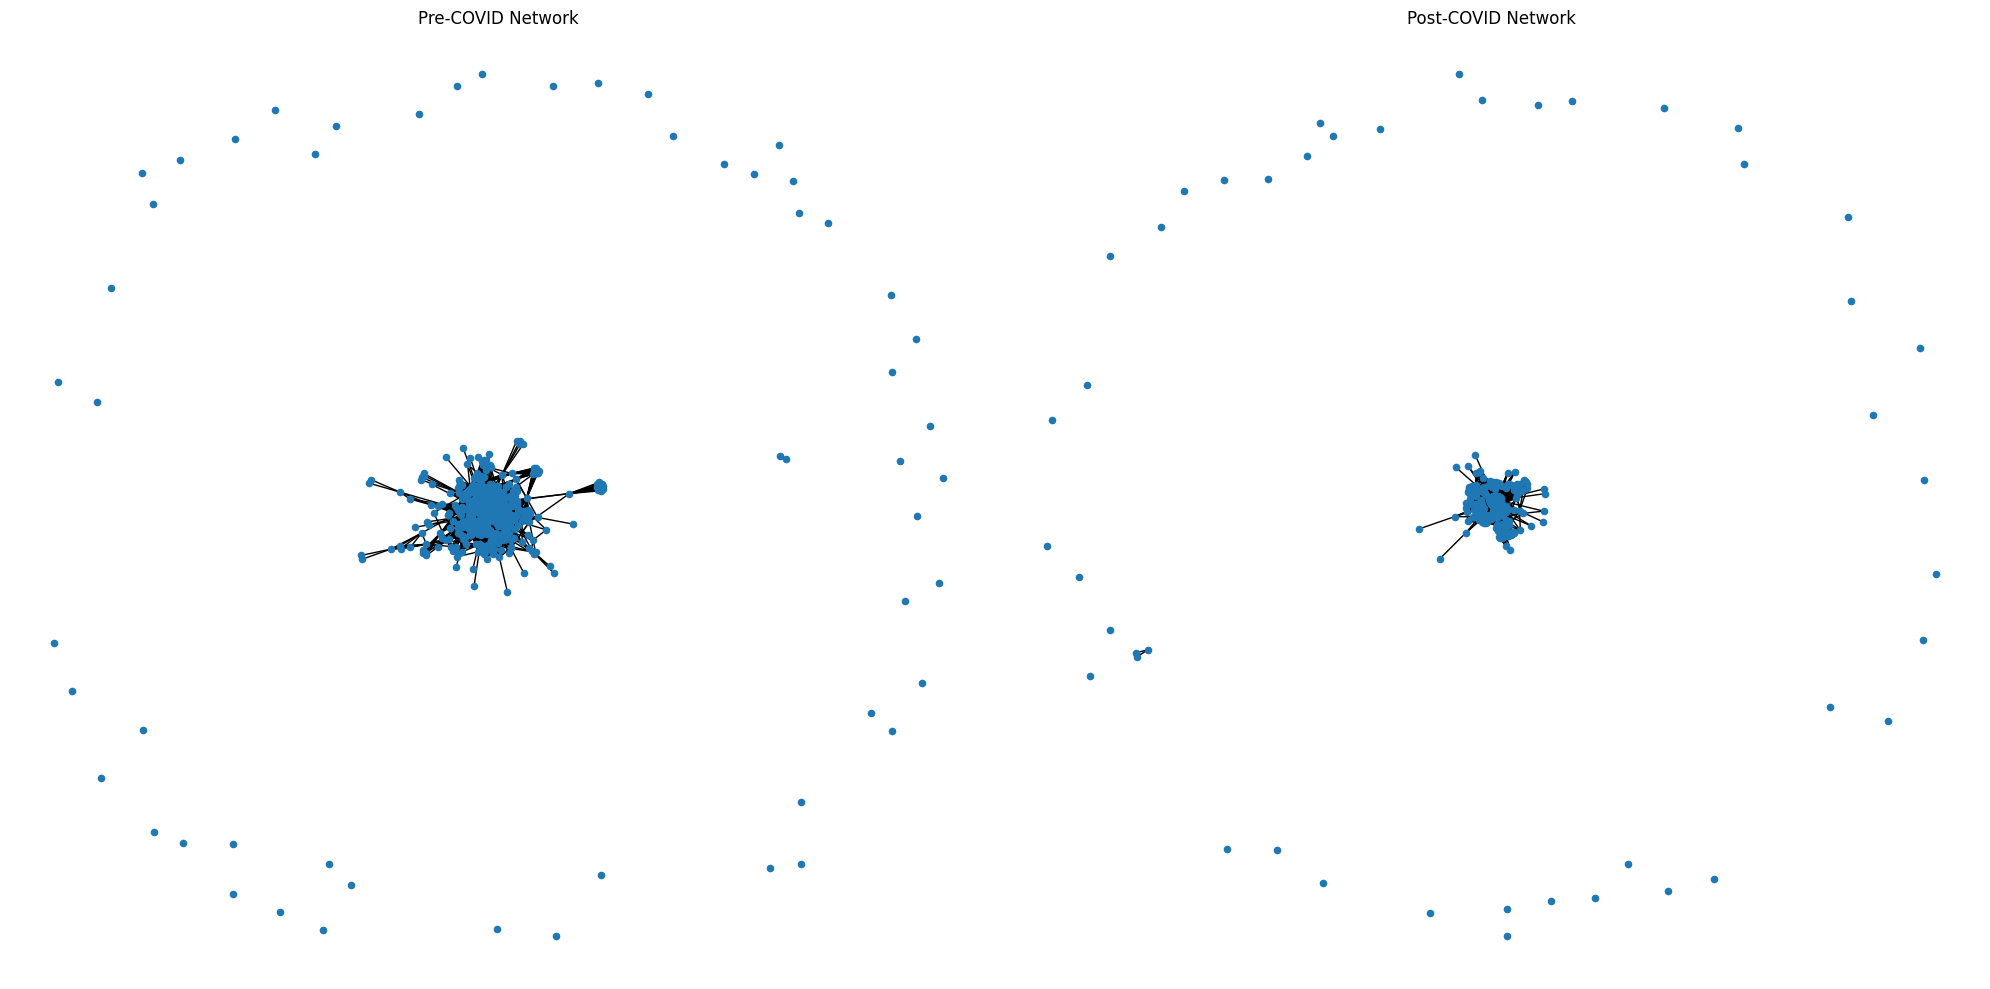

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
nx.draw_spring(G_keyword_pre, node_size=20, ax=axes[0])
axes[0].set_title('Pre-COVID Network')

nx.draw_spring(G_keyword_post, node_size=20, ax=axes[1])
axes[1].set_title('Post-COVID Network')

plt.tight_layout()
plt.show()